<a href="https://colab.research.google.com/github/MUKESHRAJMAHENDRAN/Deep-Learning--fastai/blob/main/fastai_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!nvidia-smi

Wed Apr 13 12:42:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    75W / 149W |   1340MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [29]:
!pip install fastai --upgrade

In [30]:
from fastai.vision.all import *

In [31]:
path = untar_data("https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip")

In [32]:
(path/"train").ls()

(#2) [Path('/root/.fastai/data/pizza_steak/train/pizza'),Path('/root/.fastai/data/pizza_steak/train/steak')]

In [33]:
(path/"train"/"pizza").ls()

(#750) [Path('/root/.fastai/data/pizza_steak/train/pizza/2967846.jpg'),Path('/root/.fastai/data/pizza_steak/train/pizza/271779.jpg'),Path('/root/.fastai/data/pizza_steak/train/pizza/1143057.jpg'),Path('/root/.fastai/data/pizza_steak/train/pizza/2236914.jpg'),Path('/root/.fastai/data/pizza_steak/train/pizza/2014717.jpg'),Path('/root/.fastai/data/pizza_steak/train/pizza/3530210.jpg'),Path('/root/.fastai/data/pizza_steak/train/pizza/2487039.jpg'),Path('/root/.fastai/data/pizza_steak/train/pizza/2451169.jpg'),Path('/root/.fastai/data/pizza_steak/train/pizza/1742542.jpg'),Path('/root/.fastai/data/pizza_steak/train/pizza/861771.jpg')...]

In [34]:
(path/"train"/"steak").ls()

(#750) [Path('/root/.fastai/data/pizza_steak/train/steak/922752.jpg'),Path('/root/.fastai/data/pizza_steak/train/steak/952437.jpg'),Path('/root/.fastai/data/pizza_steak/train/steak/2062248.jpg'),Path('/root/.fastai/data/pizza_steak/train/steak/268444.jpg'),Path('/root/.fastai/data/pizza_steak/train/steak/1870942.jpg'),Path('/root/.fastai/data/pizza_steak/train/steak/1209120.jpg'),Path('/root/.fastai/data/pizza_steak/train/steak/6709.jpg'),Path('/root/.fastai/data/pizza_steak/train/steak/225990.jpg'),Path('/root/.fastai/data/pizza_steak/train/steak/2446660.jpg'),Path('/root/.fastai/data/pizza_steak/train/steak/143490.jpg')...]

In [35]:
train = (path/"train").ls()

In [36]:
train

(#2) [Path('/root/.fastai/data/pizza_steak/train/pizza'),Path('/root/.fastai/data/pizza_steak/train/steak')]

In [37]:
food = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    # The following tells fastai to split training/validation based on
    # folder names, where the training set's name is 'train',
    # and the validation set's name is 'test'
    splitter=GrandparentSplitter(train_name='train', valid_name='test'),
    get_y=parent_label,
    item_tfms=Resize(128),
    )
# dls.train is the images under path/train/,
# dls.valid is the images under path/test/
dls = food.dataloaders(path)

In [38]:
food

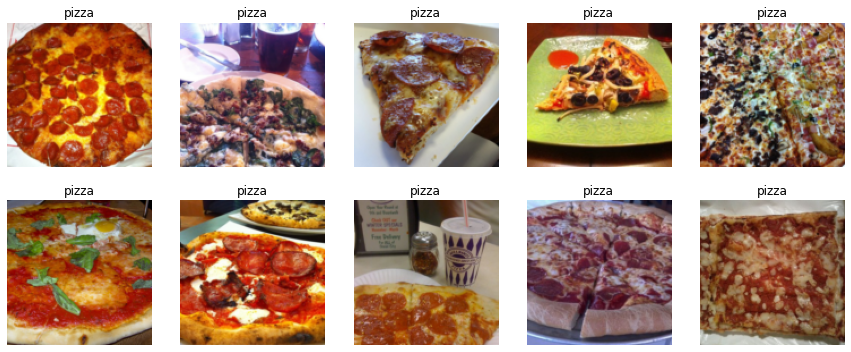

In [39]:
dls.valid.show_batch(max_n=10, nrows=2)

In [40]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.636480,0.100359,0.040000,00:20


epoch,train_loss,valid_loss,error_rate,time
0,0.266750,0.096314,0.036000,00:17
1,0.165414,0.083931,0.034000,00:14
2,0.102479,0.076060,0.026000,00:14
3,0.068157,0.077121,0.024000,00:15


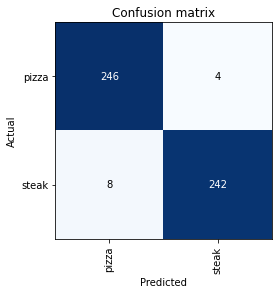

In [41]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [42]:
learn.predict("/content/pizza.jpeg")

('pizza', TensorBase(0), TensorBase([0.9947, 0.0053]))

In [43]:
learn.predict("/content/steak.jpg")

('steak', TensorBase(1), TensorBase([0.0172, 0.9828]))

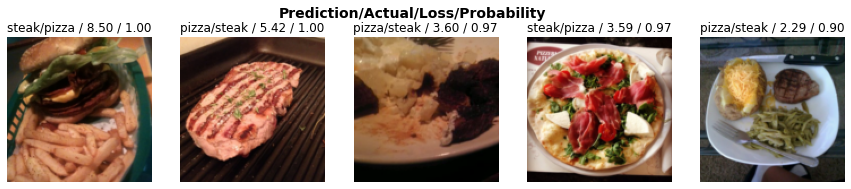

In [45]:
interp.plot_top_losses(5, nrows=1)